In [120]:
# Packages
import pandas as pd
from pandas.api.types import CategoricalDtype
import plotly.express as px
import seaborn as sns
import os
# for data transformation 
import numpy as np 
# for visualizing the data 
import matplotlib.pyplot as plt 
from matplotlib import cm
from joypy import joyplot
# for opening the media file 
import scipy.io.wavfile as wavfile

In [121]:
# Data
df = pd.read_excel('df_project2_nodubs.xlsx')

In [122]:
((df.groupby('Clip_ID')['Rating'].mean() >= 1) & (df.groupby('Clip_ID')['Rating'].mean() <= 2)).sum()

11

In [123]:
((df.groupby('Clip_ID')['Rating'].mean() > 2) & (df.groupby('Clip_ID')['Rating'].mean() <= 3)).sum()

64

In [124]:
((df.groupby('Clip_ID')['Rating'].mean() > 3) & (df.groupby('Clip_ID')['Rating'].mean() <= 4)).sum()

50

In [125]:
((df.groupby('Clip_ID')['Rating'].mean() > 4) & (df.groupby('Clip_ID')['Rating'].mean() <= 5)).sum()

1

In [126]:
(df.groupby('Clip_ID')['Rating'].mean()[df.groupby('Clip_ID')['Rating'].mean() > 2.5]).index

Index(['101c', '102c', '103c', '105c', '107c', '10c', '110c', '111c', '112c',
       '113c', '114c', '116c', '117c', '118c', '119c', '11c', '120c', '122c',
       '123c', '124c', '125c', '126c', '127c', '128c', '12c', '13c', '14c',
       '15c', '16c', '17c', '18c', '1c', '25c', '26c', '28c', '30c', '31c',
       '32c', '33c', '34c', '35c', '37c', '38c', '39c', '40c', '41c', '42c',
       '43c', '44c', '45c', '47c', '48c', '49c', '4c', '50c', '51c', '52c',
       '53c', '54c', '55c', '56c', '58c', '59c', '5c', '61c', '62c', '63c',
       '64c', '66c', '67c', '68c', '69c', '6c', '71c', '72c', '73c', '75c',
       '76c', '77c', '80c', '82c', '83c', '84c', '85c', '86c', '87c', '88c',
       '89c', '8c', '90c', '91c', '93c', '94c', '96c', '97c', '98c', '99c',
       '9c'],
      dtype='object', name='Clip_ID')

In [127]:
df_high_rating = df[df['Clip_ID'].isin((df.groupby('Clip_ID')['Rating'].mean()[df.groupby('Clip_ID')['Rating'].mean() > 2.5]).index)].reset_index(drop = True).drop(['ListenerID', 'Rating', 'CulturalGroup', 'SpeakerSex'], axis = 1).drop_duplicates().reset_index(drop = True)

In [128]:
df_high_rating = df_high_rating.loc[:, ['Clip_ID','entropy_mean' , 'entropy_sd', 'roughness_mean', 'HNR_mean', 'HNRVoiced_mean', 'CPP', 'pitch_mean', 'pitch_sd', 'scog_mean', 'scog_sd', 'Duration']].assign(rating = 'Higer Than 2.5')

In [129]:
df_low_rating = df[df['Clip_ID'].isin((df.groupby('Clip_ID')['Rating'].mean()[df.groupby('Clip_ID')['Rating'].mean() < 2.5]).index)].reset_index(drop = True).drop(['ListenerID', 'Rating', 'CulturalGroup', 'SpeakerSex'], axis = 1).drop_duplicates().reset_index(drop = True)

In [130]:
df_low_rating = df_low_rating.loc[:, ['Clip_ID','entropy_mean' , 'entropy_sd', 'roughness_mean', 'HNR_mean', 'HNRVoiced_mean', 'CPP', 'pitch_mean', 'pitch_sd', 'scog_mean', 'scog_sd', 'Duration']].assign(rating = 'Lower Than 2.5')

In [131]:
df_predictive = pd.concat([df_high_rating, df_low_rating], axis = 0, ignore_index = True)

In [132]:
df_predictive = df_predictive.melt(id_vars = ['Clip_ID', 'rating'], var_name = 'Features', value_name = 'Values')

In [133]:
df_predictive

,Clip_ID,rating,Features,Values
0,101c,Higer Than 2.5,entropy_mean,0.091835
1,102c,Higer Than 2.5,entropy_mean,0.090592
2,103c,Higer Than 2.5,entropy_mean,0.098487
3,105c,Higer Than 2.5,entropy_mean,0.049616
4,107c,Higer Than 2.5,entropy_mean,0.072938
...,...,...,...,...
1381,79c,Lower Than 2.5,Duration,3.604898
1382,7c,Lower Than 2.5,Duration,5.146122
1383,81c,Lower Than 2.5,Duration,1.854694
1384,92c,Lower Than 2.5,Duration,4.257959


In [134]:
fig = px.violin(df_predictive.loc[df_predictive['Features'].isin(['entropy_mean', 'entropy_sd']),:], y="Values", x="Features", color="rating", box=True, points="all")
fig.show()

# Spectrogram

In [135]:
df.groupby('Clip_ID')['Rating'].mean().sort_values()

Clip_ID
3c      1.178571
29c     1.323529
100c    1.360000
106c    1.666667
121c    1.686099
          ...   
63c     3.940594
113c    3.957447
30c     3.958333
124c    3.978571
18c     4.053571
Name: Rating, Length: 126, dtype: float64

In [136]:
Fs, aud = wavfile.read('audio/105c.wav') 

/var/folders/qj/4nwbnh6j0bdcnt6j_flgf0j00000gn/T/ipykernel_1844/951686916.py:1: WavFileWarning:

Chunk (non-data) not understood, skipping it.



In [137]:
Fs

44100

In [138]:
aud

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [139]:
pd.Series(aud).describe()

count    226944.000000
mean         -0.086338
std        1933.497871
min      -21205.000000
25%        -416.000000
50%           0.000000
75%         372.000000
max       24936.000000
dtype: float64

In [140]:
df.Clip_ID.sort_values(ascending = False).unique()

array(['9c', '99c', '98c', '97c', '96c', '95c', '94c', '93c', '92c',
       '91c', '90c', '8c', '89c', '88c', '87c', '86c', '85c', '84c',
       '83c', '82c', '81c', '80c', '7c', '79c', '78c', '77c', '76c',
       '75c', '74c', '73c', '72c', '71c', '70c', '6c', '69c', '68c',
       '67c', '66c', '65c', '64c', '63c', '62c', '61c', '60c', '5c',
       '59c', '58c', '57c', '56c', '55c', '54c', '53c', '52c', '51c',
       '50c', '4c', '49c', '48c', '47c', '46c', '45c', '44c', '43c',
       '42c', '41c', '40c', '3c', '39c', '38c', '37c', '36c', '35c',
       '34c', '33c', '32c', '31c', '30c', '2c', '29c', '28c', '27c',
       '26c', '25c', '24c', '23c', '22c', '21c', '20c', '1c', '19c',
       '18c', '17c', '16c', '15c', '14c', '13c', '12c', '128c', '127c',
       '126c', '125c', '124c', '123c', '122c', '121c', '120c', '11c',
       '119c', '118c', '117c', '116c', '115c', '114c', '113c', '112c',
       '111c', '110c', '10c', '107c', '106c', '105c', '104c', '103c',
       '102c', '101c', '10

/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7726: RuntimeWarning:

divide by zero encountered in log10



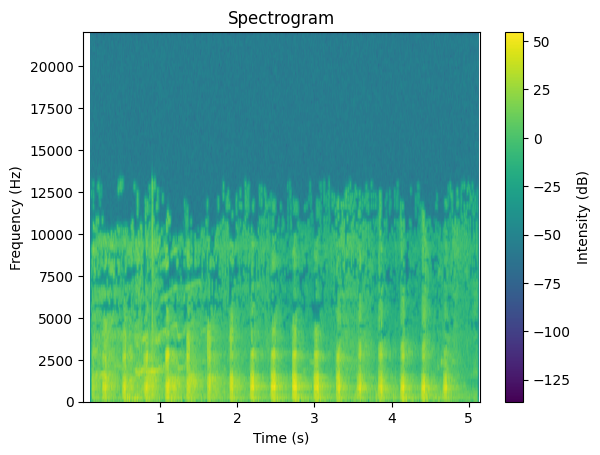

In [141]:
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(aud, Fs=Fs)
plt.title('Spectrogram')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.colorbar().set_label("Intensity (dB)")

plt.show()

In [142]:
list(df.Clip_ID.str.split('c', expand = True)[0].drop_duplicates().astype(int).sort_values().apply(lambda x: str(x) + 'c.wav').unique())

['1c.wav',
 '2c.wav',
 '3c.wav',
 '4c.wav',
 '5c.wav',
 '6c.wav',
 '7c.wav',
 '8c.wav',
 '9c.wav',
 '10c.wav',
 '11c.wav',
 '12c.wav',
 '13c.wav',
 '14c.wav',
 '15c.wav',
 '16c.wav',
 '17c.wav',
 '18c.wav',
 '19c.wav',
 '20c.wav',
 '21c.wav',
 '22c.wav',
 '23c.wav',
 '24c.wav',
 '25c.wav',
 '26c.wav',
 '27c.wav',
 '28c.wav',
 '29c.wav',
 '30c.wav',
 '31c.wav',
 '32c.wav',
 '33c.wav',
 '34c.wav',
 '35c.wav',
 '36c.wav',
 '37c.wav',
 '38c.wav',
 '39c.wav',
 '40c.wav',
 '41c.wav',
 '42c.wav',
 '43c.wav',
 '44c.wav',
 '45c.wav',
 '46c.wav',
 '47c.wav',
 '48c.wav',
 '49c.wav',
 '50c.wav',
 '51c.wav',
 '52c.wav',
 '53c.wav',
 '54c.wav',
 '55c.wav',
 '56c.wav',
 '57c.wav',
 '58c.wav',
 '59c.wav',
 '60c.wav',
 '61c.wav',
 '62c.wav',
 '63c.wav',
 '64c.wav',
 '65c.wav',
 '66c.wav',
 '67c.wav',
 '68c.wav',
 '69c.wav',
 '70c.wav',
 '71c.wav',
 '72c.wav',
 '73c.wav',
 '74c.wav',
 '75c.wav',
 '76c.wav',
 '77c.wav',
 '78c.wav',
 '79c.wav',
 '80c.wav',
 '81c.wav',
 '82c.wav',
 '83c.wav',
 '84c.wav',
 

In [143]:
folder_path = 'audio'
files = os.listdir(folder_path)

In [144]:
df.drop(['ListenerID', 'Rating', 'CulturalGroup', 'SpeakerSex'], axis = 1).drop_duplicates()

,Clip_ID,ampl_sd,ampl_noSilence_sd,entropy_mean,entropy_sd,roughness_mean,roughness_sd,HNR_mean,HNRVoiced_mean,CPP,Energy,SHR,SOE,Duration,pitch_mean,pitch_sd,scog_mean,scog_sd
0,100c,0.061300,0.066719,0.091947,0.044515,27.218036,2.030098,0.403868,4.558904,17.826442,2.834125,0.229322,0.000296,1.863673,157.394941,85.340702,737.018521,519.431828
50,101c,0.078833,0.083597,0.091835,0.035573,22.163096,2.272628,4.907817,7.504166,14.351985,7.917767,0.167410,0.002007,2.664490,278.546142,101.727894,697.685982,583.348913
153,102c,0.054808,0.060597,0.090592,0.039513,23.977232,4.104959,2.643686,7.642977,14.815611,1.935207,0.143521,0.004359,3.395918,334.256952,66.230819,1708.163376,1593.250985
249,103c,0.073987,0.078620,0.098487,0.047868,19.593577,1.976736,12.472141,12.452400,14.841414,1.657570,0.076288,0.013621,4.153469,313.055578,57.372617,1084.897386,708.498029
335,104c,0.033820,0.033262,0.109808,0.075450,25.431254,3.431049,3.216515,6.497148,14.667693,0.877424,0.192082,0.005042,2.194286,355.085990,79.981193,1782.185209,1589.910636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18023,96c,0.048914,0.048251,0.041708,0.065907,25.478209,1.401522,6.027808,6.060795,18.808713,10.587264,0.020510,0.000649,3.631020,438.663537,35.353163,2069.201865,1239.575563
18129,97c,0.104244,0.100407,0.058220,0.040396,27.447279,1.745720,0.018186,5.447161,13.725320,4.095313,0.207976,0.003024,2.533878,424.670455,55.719387,2256.742282,1253.636035
18222,98c,0.072748,0.077720,0.125905,0.065673,20.472342,3.432922,10.925837,12.818887,18.852929,6.912494,0.126341,0.000812,3.552653,309.135974,39.727833,1193.980486,831.459394
18306,99c,0.075239,0.085171,0.123221,0.077602,23.838318,5.035740,4.248119,9.858138,13.953442,1.206724,0.102672,0.011197,1.890862,340.834242,54.840155,1248.568618,743.798136


# TSNE

In [145]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [146]:
df_tsne = df.loc[:, ['Clip_ID','entropy_mean' , 'entropy_sd', 'roughness_mean', 'HNR_mean', 'HNRVoiced_mean', 'CPP', 'pitch_mean', 'pitch_sd', 'scog_mean', 'scog_sd', 'Duration']].drop_duplicates().reset_index(drop = True)

In [147]:
X = df_tsne.iloc[:, 1:]

In [148]:
X['HNRVoiced_mean'] = X['HNRVoiced_mean'].fillna(X['HNRVoiced_mean'].median())

In [149]:
X_scaled = StandardScaler().fit_transform(X)

In [150]:
X_embedded = TSNE(n_components=2, random_state = 42).fit_transform(X_scaled)
X_embedded.shape

(126, 2)

In [151]:
df_tsne['Embed 1'] = X_embedded[:, 0]
df_tsne['Embed 2'] = X_embedded[:, 1]

In [152]:
pd.concat([df_tsne, df.groupby('Clip_ID')['Rating'].mean().reset_index()], axis = 1)

,Clip_ID,entropy_mean,entropy_sd,roughness_mean,HNR_mean,HNRVoiced_mean,CPP,pitch_mean,pitch_sd,scog_mean,scog_sd,Duration,Embed 1,Embed 2,Clip_ID,Rating
0,100c,0.091947,0.044515,27.218036,0.403868,4.558904,17.826442,157.394941,85.340702,737.018521,519.431828,1.863673,7.772048,3.851555,100c,1.360000
1,101c,0.091835,0.035573,22.163096,4.907817,7.504166,14.351985,278.546142,101.727894,697.685982,583.348913,2.664490,5.393764,0.547831,101c,2.737864
2,102c,0.090592,0.039513,23.977232,2.643686,7.642977,14.815611,334.256952,66.230819,1708.163376,1593.250985,3.395918,-1.463863,3.297949,102c,3.427083
3,103c,0.098487,0.047868,19.593577,12.472141,12.452400,14.841414,313.055578,57.372617,1084.897386,708.498029,4.153469,0.581973,-6.835349,103c,3.220930
4,104c,0.109808,0.075450,25.431254,3.216515,6.497148,14.667693,355.085990,79.981193,1782.185209,1589.910636,2.194286,-2.331583,2.924759,104c,2.247788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,96c,0.041708,0.065907,25.478209,6.027808,6.060795,18.808713,438.663537,35.353163,2069.201865,1239.575563,3.631020,-3.540001,-1.131849,96c,3.415094
122,97c,0.058220,0.040396,27.447279,0.018186,5.447161,13.725320,424.670455,55.719387,2256.742282,1253.636035,2.533878,-1.041741,5.856797,97c,2.838710
123,98c,0.125905,0.065673,20.472342,10.925837,12.818887,18.852929,309.135974,39.727833,1193.980486,831.459394,3.552653,-0.213319,-6.558255,98c,3.178571
124,99c,0.123221,0.077602,23.838318,4.248119,9.858138,13.953442,340.834242,54.840155,1248.568618,743.798136,1.890862,3.420829,-2.804352,99c,3.086331


In [153]:
# Birden fazla KMeans modeli kurma
kume_ici_var = []
for sayi in range(1,11):
    # KMeans objesi oluşturma
    kmeans = KMeans(n_clusters = sayi, random_state = 42)
    # Modelin eğitilmesi
    kmeans.fit(X_scaled)
    # Küme-içi varyasyon toplamlarının ilgili listeye eklenmesi
    kume_ici_var.append(kmeans.inertia_)

/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

In [180]:
kume_ici_var

[1386.0,
 1157.338965368262,
 1016.364522532645,
 930.481534012986,
 851.3500283465423,
 792.328824588673,
 756.7694003264337,
 711.184831841256,
 687.2356759308236,
 652.5466600989791]

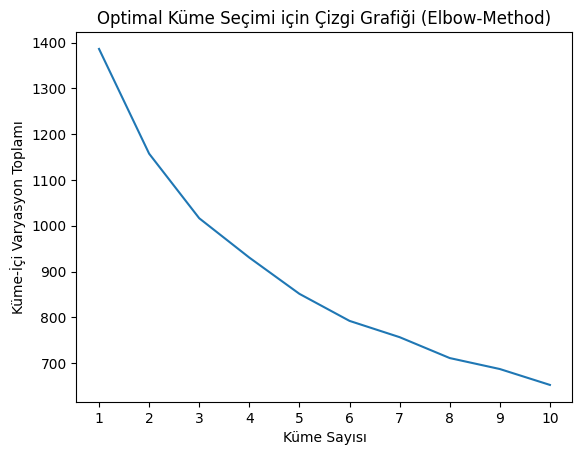

In [154]:
# Dirsek yöntemi için çizgi grafiği
plt.plot(list(range(1, 11)), kume_ici_var)
plt.xticks(ticks = list(range(1, 11)))
plt.xlabel('Küme Sayısı')
plt.ylabel('Küme-İçi Varyasyon Toplamı')
plt.title('Optimal Küme Seçimi için Çizgi Grafiği (Elbow-Method)')
plt.show() 

In [155]:
# Nihai KMeans modeli
kmeans = KMeans(n_clusters = 5, random_state = 42)

# Modelin eğitilmesi
kmeans.fit(X_scaled)

/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5, random_state=42)

In [156]:
# Kümelere düşen gözlemlerin dağılımı
pd.Series(kmeans.labels_).value_counts()

0    41
3    32
1    20
4    19
2    14
dtype: int64

In [157]:
X['cluster'] = kmeans.labels_

In [158]:
df_tsne = pd.concat([df_tsne, df.groupby('Clip_ID')['Rating'].mean().reset_index()], axis = 1)

In [159]:
df_tsne['cluster'] = kmeans.labels_

In [160]:
df_tsne['cluster'] = df_tsne['cluster'].astype('object')

In [161]:
df_tsne

,Clip_ID,entropy_mean,entropy_sd,roughness_mean,HNR_mean,HNRVoiced_mean,CPP,pitch_mean,pitch_sd,scog_mean,scog_sd,Duration,Embed 1,Embed 2,Clip_ID,Rating,cluster
0,100c,0.091947,0.044515,27.218036,0.403868,4.558904,17.826442,157.394941,85.340702,737.018521,519.431828,1.863673,7.772048,3.851555,100c,1.360000,4
1,101c,0.091835,0.035573,22.163096,4.907817,7.504166,14.351985,278.546142,101.727894,697.685982,583.348913,2.664490,5.393764,0.547831,101c,2.737864,4
2,102c,0.090592,0.039513,23.977232,2.643686,7.642977,14.815611,334.256952,66.230819,1708.163376,1593.250985,3.395918,-1.463863,3.297949,102c,3.427083,3
3,103c,0.098487,0.047868,19.593577,12.472141,12.452400,14.841414,313.055578,57.372617,1084.897386,708.498029,4.153469,0.581973,-6.835349,103c,3.220930,2
4,104c,0.109808,0.075450,25.431254,3.216515,6.497148,14.667693,355.085990,79.981193,1782.185209,1589.910636,2.194286,-2.331583,2.924759,104c,2.247788,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,96c,0.041708,0.065907,25.478209,6.027808,6.060795,18.808713,438.663537,35.353163,2069.201865,1239.575563,3.631020,-3.540001,-1.131849,96c,3.415094,3
122,97c,0.058220,0.040396,27.447279,0.018186,5.447161,13.725320,424.670455,55.719387,2256.742282,1253.636035,2.533878,-1.041741,5.856797,97c,2.838710,3
123,98c,0.125905,0.065673,20.472342,10.925837,12.818887,18.852929,309.135974,39.727833,1193.980486,831.459394,3.552653,-0.213319,-6.558255,98c,3.178571,2
124,99c,0.123221,0.077602,23.838318,4.248119,9.858138,13.953442,340.834242,54.840155,1248.568618,743.798136,1.890862,3.420829,-2.804352,99c,3.086331,1


<AxesSubplot: xlabel='Embed 1', ylabel='Embed 2'>

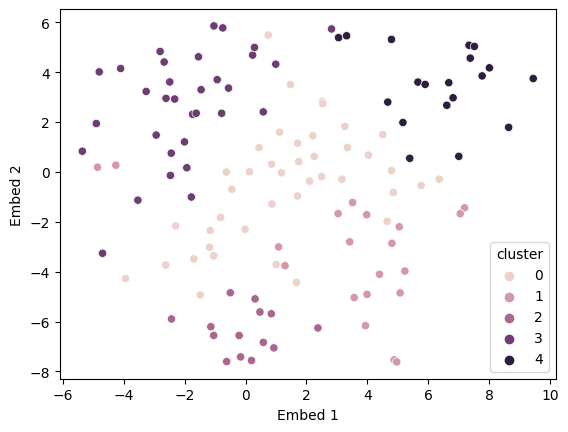

In [162]:
sns.scatterplot(df_tsne, x = 'Embed 1', y = 'Embed 2', hue = 'cluster')

In [163]:
px.scatter(data_frame = df_tsne, x = 'Embed 1', y = 'Embed 2', color = 'cluster')

In [164]:
tsne_df = pd.concat([df_tsne.iloc[:,:14], df_tsne.loc[:, ['Rating', 'cluster']]], axis = 1)

In [165]:
tsne_df['cluster'] = tsne_df['cluster'].replace([0, 1, 2, 3, 4], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])

In [166]:
tsne_df['Clip_ID'] =tsne_df['Clip_ID'].apply(lambda x: str(x) + '.wav')

In [167]:
tsne_df.columns

Index(['Clip_ID', 'entropy_mean', 'entropy_sd', 'roughness_mean', 'HNR_mean',
       'HNRVoiced_mean', 'CPP', 'pitch_mean', 'pitch_sd', 'scog_mean',
       'scog_sd', 'Duration', 'Embed 1', 'Embed 2', 'Rating', 'cluster'],
      dtype='object')

In [168]:
tsne_df.groupby('cluster').agg({
    'Rating':['mean', 'std', 'min', 'max'],
    'entropy_mean':['mean', 'std', 'min', 'max'],
    'entropy_sd':['mean', 'std', 'min', 'max'],
    'roughness_mean':['mean', 'std', 'min', 'max']
})

Rating                               entropy_mean            \
               mean       std       min       max         mean       std   
cluster                                                                    
Cluster 1  3.044109  0.529532  2.079320  3.978571     0.071825  0.022411   
Cluster 2  2.838375  0.607755  1.779661  3.957447     0.117655  0.034664   
Cluster 3  3.118346  0.356500  2.418605  3.587629     0.095024  0.021925   
Cluster 4  2.978736  0.498962  1.927419  4.053571     0.091107  0.026652   
Cluster 5  2.224090  0.598991  1.178571  3.160714     0.081960  0.030045   

                              entropy_sd                                \
                min       max       mean       std       min       max   
cluster                                                                  
Cluster 1  0.031841  0.141804   0.044403  0.014413  0.022937  0.082477   
Cluster 2  0.063573  0.212021   0.095220  0.042804  0.048391  0.209268   
Cluster 3  0.042793  0.125905   0.059333  0.020526  0.032764  0.119594   
Cluster 4  0.041708  0.161950   0.057781  0.026538  0.028104  0.131561   
Cluster 5  0.030650  0.145845   0.053609  0.018708  0.022460  0.089394   

          roughness_mean                                  
                    mean       std        min        max  
cluster                                                   
Cluster 1      22.396192  1.390831  19.470253  25.928850  
Cluster 2      21.649625  1.838490  19.035208  25.125978  
Cluster 3      20.611584  1.240237  18.669599  23.400187  
Cluster 4      24.716046  1.553754  22.112374  29.837283  
Cluster 5      24.889750  1.685168  22.163096  27.828656

In [169]:
tsne_df

,Clip_ID,entropy_mean,entropy_sd,roughness_mean,HNR_mean,HNRVoiced_mean,CPP,pitch_mean,pitch_sd,scog_mean,scog_sd,Duration,Embed 1,Embed 2,Rating,cluster
0,100c.wav,0.091947,0.044515,27.218036,0.403868,4.558904,17.826442,157.394941,85.340702,737.018521,519.431828,1.863673,7.772048,3.851555,1.360000,Cluster 5
1,101c.wav,0.091835,0.035573,22.163096,4.907817,7.504166,14.351985,278.546142,101.727894,697.685982,583.348913,2.664490,5.393764,0.547831,2.737864,Cluster 5
2,102c.wav,0.090592,0.039513,23.977232,2.643686,7.642977,14.815611,334.256952,66.230819,1708.163376,1593.250985,3.395918,-1.463863,3.297949,3.427083,Cluster 4
3,103c.wav,0.098487,0.047868,19.593577,12.472141,12.452400,14.841414,313.055578,57.372617,1084.897386,708.498029,4.153469,0.581973,-6.835349,3.220930,Cluster 3
4,104c.wav,0.109808,0.075450,25.431254,3.216515,6.497148,14.667693,355.085990,79.981193,1782.185209,1589.910636,2.194286,-2.331583,2.924759,2.247788,Cluster 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,96c.wav,0.041708,0.065907,25.478209,6.027808,6.060795,18.808713,438.663537,35.353163,2069.201865,1239.575563,3.631020,-3.540001,-1.131849,3.415094,Cluster 4
122,97c.wav,0.058220,0.040396,27.447279,0.018186,5.447161,13.725320,424.670455,55.719387,2256.742282,1253.636035,2.533878,-1.041741,5.856797,2.838710,Cluster 4
123,98c.wav,0.125905,0.065673,20.472342,10.925837,12.818887,18.852929,309.135974,39.727833,1193.980486,831.459394,3.552653,-0.213319,-6.558255,3.178571,Cluster 3
124,99c.wav,0.123221,0.077602,23.838318,4.248119,9.858138,13.953442,340.834242,54.840155,1248.568618,743.798136,1.890862,3.420829,-2.804352,3.086331,Cluster 2


In [170]:
tsne_df.to_csv('tsne_df.csv', index = False)

In [171]:
tsne_df.groupby('cluster')['Rating'].mean().reset_index()

,cluster,Rating
0,Cluster 1,3.044109
1,Cluster 2,2.838375
2,Cluster 3,3.118346
3,Cluster 4,2.978736
4,Cluster 5,2.224090


In [172]:
px.bar(tsne_df.groupby('cluster')['Rating'].mean().reset_index().rename(columns = {'Rating':'Average Rating'}).round(3), y = 'cluster', x = 'Average Rating', color = 'cluster', text = 'Average Rating',
                                                            title = 'Average Rating per Cluster <br><sup>Clusters Obtained from K-means Clustering Algorithm</sup>')

# Ridgeline

In [173]:
# Average rating
df['Avg_rating'] = df['Clip_ID'].map(df.groupby('Clip_ID')['Rating'].mean().to_dict())
df_example = df[df['Clip_ID'].isin(['1c', '2c', '3c', '4c', '5c', '6c', '7c', '8c', '9c', '10c', '11c', '12c'])].reset_index(drop = True)

In [174]:
cat_clip = CategoricalDtype(
    df_example.sort_values(by = 'Avg_rating')['Clip_ID'].unique()
)

In [175]:
df_example['Clip_ID'] = df_example['Clip_ID'].astype(cat_clip)

/Users/tahaerensarnic/Desktop/contagious-viz/venv/lib/python3.9/site-packages/joypy/joyplot.py:435: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



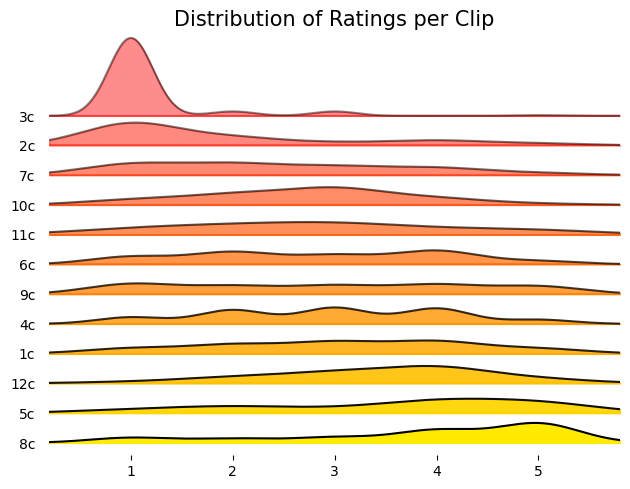

In [176]:
fig, ax = plt.subplots()

joyplot(
    data=df_example,
    column = 'Rating',
    by='Clip_ID',
    colormap=cm.autumn, fade = True,
    range_style='own', figsize = (6,6),
    ax = ax

)
plt.title('Distribution of Ratings per Clip', fontsize=15)
plt.show()

In [177]:
def rating_cat(data):
    if data >= 1.17 and data < 2.45:
        return 'Not Contagious'
    elif data >= 2.45 and data < 2.88:
        return 'Contagious'
    elif data >= 2.88 and data < 3.22:
        return 'More Contagious'
    else:
        return 'Most Contagious'

In [178]:
df['rating_categories'] = df['Avg_rating'].apply(rating_cat)

In [179]:
df.groupby('Clip_ID').agg({
            'Rating':['mean', 'std']
        }).reset_index()['Rating']

,mean,std
0,1.360000,0.920514
1,2.737864,1.162833
2,3.427083,1.220395
3,3.220930,1.259329
4,2.247788,1.193158
...,...,...
121,3.415094,1.278898
122,2.838710,1.163674
123,3.178571,1.213982
124,3.086331,1.099947
